<h1><center>Analyzing Hate Crimes in the US</center></h1>
<h3><center>DS2001: Social Science Practicum  | Ananda Francis & Cat Quaintance</center></h3>

# Problem Statement and Background

A  `hate crime` as defined by the Oxford Dictionary, is “a crime, typically one involving violence, that is motivated by prejudice on the basis of race, religion, sexual orientation, or other grounds,” : a continuous issue in America today. With marginalized communities constantly facing intolerance and discrimination at school, work, and other societal systems and structures, there is a discussion to be had about what influences `hate crimes` and how can we test the cause and effects.  

In this research investigation we plan to explore different economic, social, cultural, and political factors' correlation to `reported hate crime rates` to better understand what types of environments prevent vs provoke `hate crimes` and how we can better understand the offenders and victims of hate crimes. 

# Introduction and Description of the Data


### Why We Choose Specific Datasets

Firstly, we wanted to use datasets that came from reliable resources so government collected data through US Census Bureau and other .gov sites were our first places to look for this data. Also, since we are testing 16 different variables with `reported hate crime rates` we wanted to be other factors/variables as controlled as possible so we used most, if not all 2016 datasets for consistency. We also prioritized using datasets that didn't have NaN values so that we can use all of the states' data and have as many data points as possible for each of the graphs. Also the linear regression function would not work if there were NaN values in the dataset. 



### What Impact This Investigation Has

In a country that is finally beginning a monumental, national and even global discussion on systemic oppression including but not limited to racism, eurocentrism, misogyny, xenophobia, nativism, homophobia, transphobia, and classism, this research is important because it can influence ways the we can reform our culture and public policy to not only create and invest in environments that prevent rather than provoke hate crimes, but also tackle issues of systemic oppression faced by marganilized communities. 





### Header Variable descriptions 


In the data frame below, each column represents a specific variable that we will be using for correlation testing. Below are descriptions of what these variables mean, their source and year of publication.

`state`: state name

`population`: estimated number of residents for each state, 2016 , US Census Bureau 

`median_income`: median household income, 2016, US Census Bureau 

`poverty`: share of residents who are living in poverty, 2016, US Census Bureau

`unemployed`: share of population that is unemployed (seasonally adjusted), Sept. 2016, US Census Bureau 

`metro_population`: share of the population that lives in metropolitian areas, 2015

`hs_diploma`: share of population with a high school diploma or equivalent, 2016, US Census Bureau 

`foreignborn`: share of the population that is born outside of the US, 2016, US Census Bureau 

`white_poverty`: share of white residents who are living in poverty, 2015

`gini_index`: Gini Index, a measure of income inequality, 2015

`non_white`: share of the population that is not white, 2016, US Census Bureau 

`trump_voters`: share of 2016 U.S. presidential voters who voted for Donald Trump

`hate_crime_2016`: hate crimes per resident, 2016, US Census Bureau

`hc16`: hate crimes per 100,000 residents

`hate_crime_2017`: hate crimes per resident, 2017, US Census Bureau

`hc17`: hate crimes per 100,000 residents

`election_result`: outcome to 2016 Presidential election for each state (red or blue) 

`college_degree`: share of population with 4 year college degree or higher, US Census Bureau 

`christian`: share of population that is Christian (based on sample survey) 2014

`gun_law`: strictness of gun laws on ranking of 1 to 5, 1 being strictest and 5 being most lenient, GunsToCarry

`men_to_women`: ratio of men to every 100 women, 2018, Statista.com

`gay_marriage`: states will be given a "1", "3", or "5" score based on their legalization of same sex marraige before the ruling of Obergefell v. Hodges. "1" means banned by state law, "3" means there was not a same-sex marriage ban in effect but some counties were not issuing marriage licenses to same-sex couples, and "5" means same-sex marriage was legalized at the state level before the ruling

`policing`: state spending on police per resident, 2017, US Census Bureau

In [2]:
import pandas as pd

# create pandas dataframe out of csv file of data
data = pd.read_csv("hate_crime.csv")

# add 2 columns in the dataframe --> make hate crime per 100k resident instead of per single resident
data['hc16'] = data['hate_crime_2016'] * 100000
data['hc17'] = data['hate_crime_2017'] * 100000

# create a column for the difference in hate crime rates from 2017 to 2016 
# to measure if hate crimes for that state increased or decreased and by how much 
data['hc_'] = data['hc17'] - data['hc16']

# output the dataframe 
data

,state,hate_crime_2016,hate_crime_2017,population,median_income,poverty,hs_diploma,foreignborn,non_white,college_degree,...,gun_law,men_to_women,gay_marriage,policing,trump_voters,gini_index,metro_population,hc16,hc17,hc_
0,Alabama,0.000014,0.000003,4903185,51734,0.155,0.871,0.036,0.322,0.263,...,4,94.1,3,261,0.63,0.472,0.64,1.380,0.308,-1.072
1,Alaska,0.000015,0.000005,731545,75463,0.101,0.936,0.080,0.358,0.302,...,5,108.0,3,494,0.53,0.422,0.63,1.490,0.543,-0.947
2,Arizona,0.000034,0.000039,7278717,62055,0.135,0.976,0.134,0.217,0.301,...,5,98.9,3,355,0.50,0.455,0.90,3.350,3.910,0.560
3,Arkansas,0.000004,0.000002,3017804,48952,0.162,0.875,0.051,0.233,0.234,...,3,96.1,1,224,0.60,0.458,0.69,0.421,0.247,-0.174
4,California,0.000024,0.000028,39512223,90440,0.118,0.840,0.267,0.610,0.345,...,1,98.9,3,487,0.33,0.471,0.97,2.370,2.770,0.400
5,Colorado,0.000019,0.000019,5758736,77127,0.093,0.924,0.095,0.163,0.426,...,3,101.2,3,330,0.44,0.457,0.80,1.880,1.900,0.020
6,Connecticut,0.000030,0.000031,3565287,78833,0.100,0.907,0.148,0.254,0.398,...,3,95.0,5,330,0.41,0.486,0.94,2.960,3.090,0.130
7,Delaware,0.000016,0.000030,973764,70176,0.113,0.903,0.100,0.323,0.332,...,1,93.7,5,396,0.42,0.440,0.90,1.580,3.010,1.430
8,Florida,0.000011,0.000007,21477737,59227,0.127,0.884,0.211,0.255,0.307,...,4,95.5,3,406,0.49,0.474,0.96,1.070,0.707,-0.363
9,Georgia,0.000005,0.000003,10617423,61980,0.133,0.879,0.103,0.422,0.325,...,4,94.8,1,262,0.51,0.468,0.82,0.475,0.302,-0.173


# Methods

In this research investigation, we graphed and calculated the type and magnitude of the correlation between `reported hate crimes` in each state to `median household income`, `share of population with high school diplomas`, `share of population with college degrees`, `share of population that is foreign born population`, `share of white residents in poverty`, `share of overall residents in poverty`, `gun control policies`, `Trump winning office`, `gini index`, `metropolitan areas`, `share of population that is Christian`, `share of population that is male vs female`, `state tolerance of same sex marriage before Obergefell v. Hodges`, `law enforcement budgets`, and `share of population that is not white`, with the goal of finding which of these listed variables is most closely correlated, postivitely or negatively to `reported hate crime rates` in the US. 

 In all of the graphs we will be making `hate crimes` the y axis variable because we are testing every hate crime variable's dependence on the other vairables listed below. We will be using the magnitude of the slope in the equation of the line of best fit for each scatter plot to determine correlation (the higher the slope magnitude, the higher the correlation). The R squared value, though useful, tells us more how closely the data fits the line of best fit and less how closely related the data is to each other. Which is why we are using magnitude of the slope in the line of best fit to measure correlation, because the higher the magnitude of the slope, the more consistent the trend in the data. 
 
We also use linear regression to calculate the line of best fit, though in a more formal and detailed investigation in the future we may consider other forms of regressions, so that we can use the line with the highest R squared value, out of all different regression lines we produce per scatterplot so that we use the magnitude of slope/rate of change for best line of best fit for each graph to get a more accurate understanding of what variable is most correlated to `reported hate crime rates`. 

# Investigation and Research 

The way our investigation is set up we will first introduce each variable with a brief explanation of why we think it's relevant and based on what we know (whether background knowledge or as we get furthur into the investigation what we see in the graphs) what we hypothesize will the correlation outcome. After we graph the scatterplot/bar graph and the linear regression line of best fit, we will include what the actual correlation is and the equation as well as R squared value for the line of best fit. 

This will be followed with rankings for the all the variables tested, one list of positive correlations, another of rnegative, ranked from highest to lowest correlation, along with potential explanations of why those results occured. We associated variables with slope magnitudes of 6 and higher to have strong correlation, 1-5 have moderate correlations and 0-1 have weak correlations. 

## Visualizations and Correlation Tests

### Variable Relevance to Reported Hate Crime Rates
First variable we want to test with `reported hate crime rates` is `median household income`. Being that hate crimes are crimes committed against marganlized victims based on prejudice of the assailant, we want to test to see what connection hate crimes (which are fueled by aggression and prejudice) have to median household income. Could states of lower median household incomes be connected to higher reported hate crime rates (if we are thinking about the connection between poverty and crime)? 

### Correlation Prediction 
Based on the line of reasoning above we predict that the correlation between `reported hate crime rates` and `median household income` will have a strong/moderate positive correlation. 

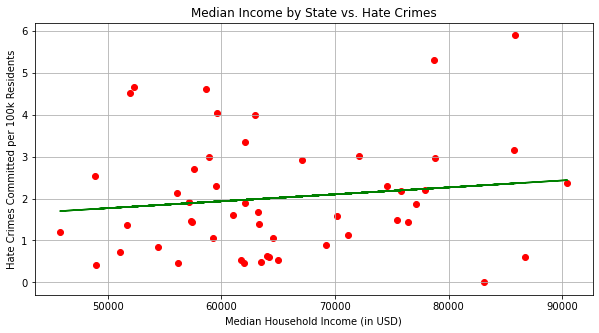

In [396]:
# import libraries 
import matplotlib.pyplot as plt
import sklearn.linear_model as lm 

# create x and y variables
hc = data['hc16']
mi = data['median_income']

# generate line of best fit 
mi_data = mi.values.reshape(-1,1)
model = lm.LinearRegression().fit(mi_data, hc)
predicted = model.predict(mi_data)

# plot the line of best fit and scatter plot 
plt.figure(figsize=(10,5))
plt.plot(mi, predicted,c='g')
plt.scatter(mi, hc, c='r')

# add labels and titles 
plt.title('Median Income by State vs. Hate Crimes')
plt.xlabel('Median Household Income (in USD)')
plt.ylabel('Hate Crimes Committed per 100k Residents')

# create grid for graph
plt.grid()

### Line of Best Fit and Correlation Result 
In the graph above, the equation for `line of best fit` is  y = 2E-05x + 0.4974 with R^(2) = 0.0356. There is weak positive correlation between rate of `reported hate crimes` and `median income`. 

### Variable Relevance to Reported Hate Crime Rates
The second variable we want to test with `hate crime rates` is `unemployed`. As mentioned before, `hate crimes` are fueled by aggression and prejudice, and unemployment (a plight that can cause housing and food insecuirty, instable relationships, etc) can cause more residents to be living in poverty which we know is connected to overall crime. Could states of higher unemployment rates experience higher reported hate crime rates? 

### Correlation Prediction 
Based on this line of reasoning above we predict that the correlation between `reported hate crime rates` and `unemployed` will have a moderate/weak positive correlation since we are also taking into account the correlation of `reported hate crimes` and `median household income` was a weak correlation which has implications and connections to unemployment rate. 

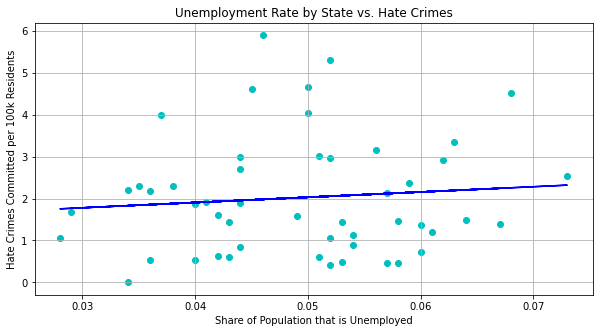

In [397]:
# create x and y variables
hc = data['hc16']
un = data['unemployed']

# generate line of best fit 
un_data = un.values.reshape(-1,1)
model = lm.LinearRegression().fit(un_data, hc)
predicted = model.predict(un_data)

# plot the line of best fit and scatter plot 
plt.figure(figsize=(10,5))
plt.scatter(un, hc, c='c')
plt.plot(un, predicted,c='b')

# add labels and titles 
plt.title('Unemployment Rate by State vs. Hate Crimes')
plt.xlabel('Share of Population that is Unemployed')
plt.ylabel('Hate Crimes Committed per 100k Residents')

# create grid for graph
plt.grid()

### Line of Best Fit and Correlation Result 
In the graph above, the equation for `line of best fit` is  y = 7.0773x + 1.7119 with an R^(2) = 0.0028. There is strong positive correlation between rate of `reported hate crimes` and rate of `unemployed`.

### Variable Relevance to Reported Hate Crime Rates
Third variable we want to test with `reported hate crime rates` is `metropolitan poluation`. Metropolitan populations are defined as the share of residents of a state living in a dense urban environment. Urban environments have been connected to more diverse populations as well as more condensed poverty. The more concentrated poverty in an area the more prevalance of overal crime and the more people diversity of population in a given area can either mean more tolerance in that area therefore a lower occurence of hate crimes or more targets (because more marganilized communities prevalent at a given population) which could cause a higher `report hate crime rate`. 

### Correlation Prediction 
Based on this line of reasoning, we predict that `reported hate crime rates` and `metropolitan popluation` will have a weak correlation, whether positive or negative because the potential explanation above of more tolerance would support a strong negative correlation and the potential explanation above of more "targets" would support a strong positive correlation so we predict that these factors will balance out to generate a weak correlation on either side. 

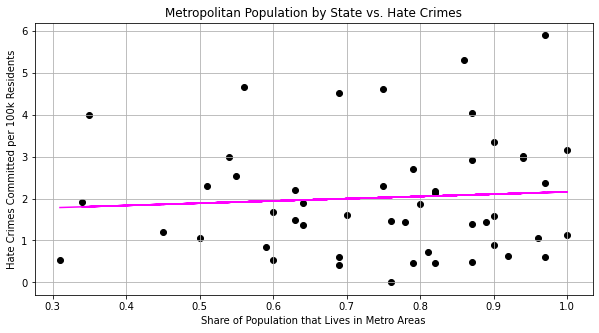

In [398]:
# create x and y variables
hc = data['hc16']
mp = data['metro_population']

# generate line of best fit 
mp_data = mp.values.reshape(-1,1)
model = lm.LinearRegression().fit(mp_data, hc)
predicted = model.predict(mp_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(mp, hc, c='k')
plt.plot(mp, predicted,c='magenta')

# add labels and titles 
plt.title('Metropolitan Population by State vs. Hate Crimes')
plt.xlabel('Share of Population that Lives in Metro Areas')
plt.ylabel('Hate Crimes Committed per 100k Residents')

# create grid for graph
plt.grid()

### Line of Best Fit and Correlation Result 
In the graph above, the equation for `line of best fit` is  y = 0.5625x + 1.6435 with a R^(2) = 0.0055. There is a weak positive correlation between rate of `reported hate crimes` and rate of `metropolitan poluation`.

### Variable(s) Relevance to Reported Hate Crime Rates
The fourth and fifth variable we want to test with `reported hate crime rates` are `high school diplomas` and `college degrees`. Higher levels of education, we believe to be connected to awareness, higher median income, and more informed population which can impact `reported hate crime rates` in the sense that the more informed and aware a population is the lower the `reported hate crime rate` and `median income` and `high levels of education` seem to have a positive correlation (the higher level of education a population has, the higher paying jobs they qualify for, the higher the `median income`). 

### Correlation Prediction 
Based on this line of reasoning, we predict `reported hate crime rates` and `highest level of education` will have a weak positive or negative (most likely negative) correlation (taking into consideration `median income` had a weak positive correlation and our explanation of high education levels possibly leading to lower `report hate crime rates`, or a negative correlation). 

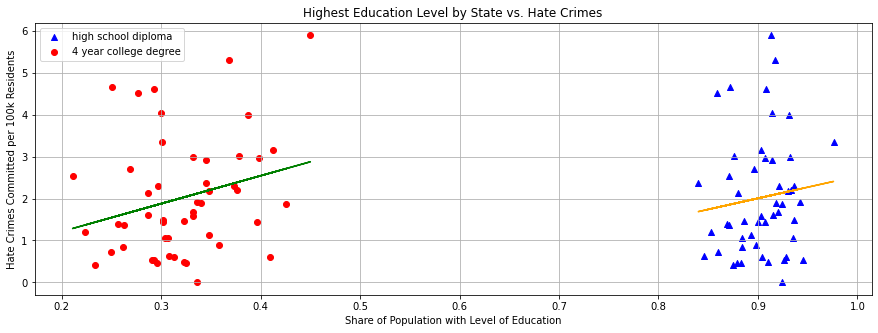

In [399]:
# create x and y variables
hc = data['hc16']
hs = data['hs_diploma']
cd = data['college_degree']

# generate line of best fit 
hs_data = hs.values.reshape(-1,1)
model1 = lm.LinearRegression().fit(hs_data, hc)
predicted1 = model1.predict(hs_data)

cd_data = cd.values.reshape(-1,1)
model2 = lm.LinearRegression().fit(cd_data, hc)
predicted2 = model2.predict(cd_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(15,5))
plt.scatter(hs, hc, c='b',label = 'high school diploma', marker='^')
plt.scatter(cd, hc, c='r',label = '4 year college degree')
plt.plot(hs, predicted1, c='orange')
plt.plot(cd, predicted2, c='green')

# add labels and titles 
plt.title('Highest Education Level by State vs. Hate Crimes')
plt.xlabel('Share of Population with Level of Education')
plt.ylabel('Hate Crimes Committed per 100k Residents')

plt.legend()
plt.grid()

### Line(s) of Best Fit and Correlation Result 

In the graphs above, the equations for `lines of best fit` are y = 5.3401x + 0.2953 with a R^(2) = 0.0567 for `college degrees` and y = 4.4138x - 1.7703 with a R^(2) = 0.0121 for `high school diplomas`. There is a moderate positive correlation between `reported hate crimes rates` and `high school diplomas` and `reported hate crime rates` and `college degrees`.

### Variable(s) Relevance to Reported Hate Crime Rates
The sixth variable we want to test with `hate crime rates` is `foreign born poluation`. Being that hate crimes are prejudice and intolerance motivated crimes it would be interesting to see how these variables correlate. The US has a long history of xenophobia and nativism especially in our immigration policies, employment practices and foreign policy. Similar to `metropolitan poluation`, `foreign born poluation` can be connected to diversity of an area which can either mean more tolerance in that area or more targets for hate crimes, there various outcomes this correlation test can produce. 

### Correlation Prediction 
Due to similar conditions to `metropolitan poluation`, we predict this test will result in a weak positive or negative correlation (since the explanations above suggest it can swing either way). 


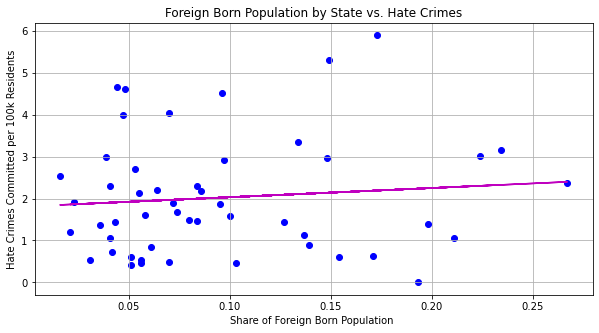

In [400]:
# create x and y variables
hc = data['hc16']
nc = data['foreignborn']

# generate line of best fit
nc_data = nc.values.reshape(-1,1)
model = lm.LinearRegression().fit(nc_data, hc)
predicted = model.predict(nc_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(nc, hc, c='b')
plt.plot(nc, predicted,c='m')

# add labels and titles 
plt.title('Foreign Born Population by State vs. Hate Crimes')
plt.xlabel('Share of Foreign Born Population ')
plt.ylabel('Hate Crimes Committed per 100k Residents')


plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = 6.5785x + 1.7085 with a R^(2) = 0.02. There is a strong positive correlation between `reported hate crimes rates` and `foreign born poluation`. 

### Variable(s) Relevance to Reported Hate Crime Rates
The seventh and eigth variables we want to test with `reported hate crime rates` are `overall poverty` and `white poverty`. This test is interesting becaue we know that poverty is connected to `unemployment` and `median incomes`. We also know that poverty is connected to crime and can imagine how especially areas of white poverty can fuel the amount of racial tension and prejudice sentiment to provoke hate crimes in that area. 

### Correlation Prediction 

In terms of correlation prediction, we can assume, the higher the rate of unemployment, the higher the rate of poverty (so whatever the correlation was for `unemployed` COULD be similar for `poverty`), and the higher the rate of poverty, the lower the median income (so whatever the correlation for `median income` COULD be opposite for `poverty`). There was a weak positive correlation between `reported hate crimes rates` and `median income` and a strong positive correlation between rate of `reported hate crimes`and rate of `unemployment`. It suggests that `poverty` would either have a weak negative correlation or a strong positive correlation so we predict that there will a moderate positive correlation between `hate crime rates` and `overall poverty` and `white poverty`. 

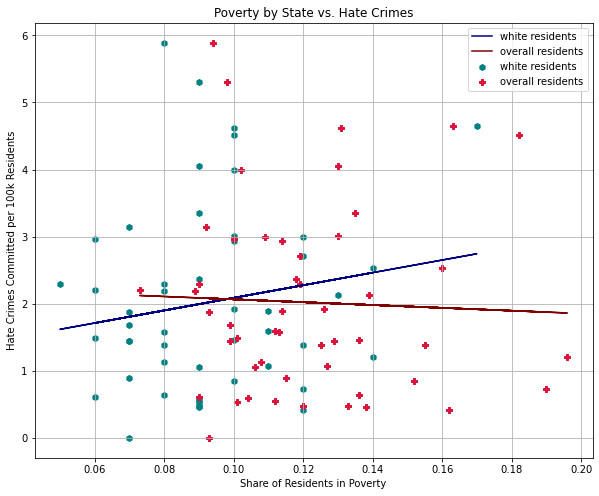

In [401]:
# create x and y variables
hc = data['hc16']
wp = data['white_poverty']
op = data['poverty']

# generate lines of best fit
wp_data = wp.values.reshape(-1,1)
model1 = lm.LinearRegression().fit(wp_data, hc)
predicted1 = model1.predict(wp_data)

op_data = op.values.reshape(-1,1)
model2 = lm.LinearRegression().fit(op_data, hc)
predicted2 = model2.predict(op_data)

# plot the lines of best fit and scatter plost
plt.figure(figsize=(10,8))
plt.scatter(wp, hc, c='teal', marker='h', label='white residents')
plt.scatter(op, hc, c='crimson', marker='P', label='overall residents')
plt.plot(wp, predicted1,c='navy', label = 'white residents')
plt.plot(op, predicted2,c='maroon', label = 'overall residents')

# add labels and titles 
plt.title('Poverty by State vs. Hate Crimes')
plt.xlabel('Share of Residents in Poverty')
plt.ylabel('Hate Crimes Committed per 100k Residents')

plt.legend()
plt.grid()

### Lines of Best Fit and Correlation Results
In the graphs above, the equations for `lines of best fit` are y = 7.8632x + 1.3291 with a R^(2) = 0.0184 for `white poverty` and y = -3.8659x + 2.5342 with a R^(2) = 0.0057 for `overall poverty`. There is a strong positive correlation between `reported hate crimes rates` and `white poverty` and strong negative correlation between `reported hate crimes rates` and `overall poverty`.

### Variable(s) Relevance to Reported Hate Crime Rates
The ninth variable we want to test with `reported hate crime rates` is `gini index`. `Gini Index` is a metric for income inequality so the higher the `gini index` of a population, the higher the income inequality in that population. Income inequality is an important factor in `reported hate crime rates` because of its connection to higher rates of health and social problems, and lower rates of social goods, and a lower population-wide satisfaction and happiness (all factors that can contiriute to higher `reported hate crime rates`. 

### Correlation Prediction 
We predict that because of what `gini index` can mean for a popluation that there will be a strong/moderate positive correlation between `hate crime rates` and `gini index`. 

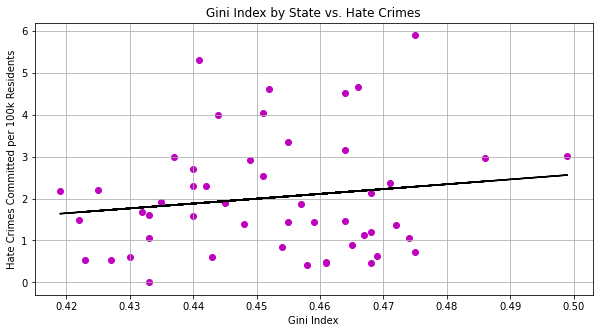

In [402]:
# create x and y variables
hc = data['hc16']
gi = data['gini_index']

# generate line of best fit
gi_data = gi.values.reshape(-1,1)
model = lm.LinearRegression().fit(gi_data, hc)
predicted = model.predict(gi_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(gi, hc, c='m')
plt.plot(gi, predicted, c='k')

# add labels and titles 
plt.title('Gini Index by State vs. Hate Crimes')
plt.xlabel('Gini Index')
plt.ylabel('Hate Crimes Committed per 100k Residents')


plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = 9.2207x - 2.1107 with a R^(2) = 0.0141. There is a strong positive correlation between `reported hate crime rates` and `gini index`. 

### Variable(s) Relevance to Reported Hate Crime Rates
The tenth variable we want to test with `hate crime rates` is `non white population`. The share of `non white residents` in a population is connected to the level of racial diversity in that population. As discussed earlier when talking about `metropolitan populations` and `foreign born populations`, diversity can influence the tolerance of a given population towards those different than them (the more tolerance, the less prejudice, which likely lead to less hate crimes) and/or the amount of targets in a population (the more targets the easier it is to commit a hate crime), which are supporting explanations for different possible outcomes --> positive vs negative correlation. 

### Correlation Prediction 
Based on `hate crime rates` and `metropolitan populations` having a moderate positive correlation and `hate crime rates` and `foreign born populations` having a strong positive correlation, we predict that `hate crime rates` and `non white population` would have moderate/strong positive correlation, supporting the notion that the higher diversity influences higher `hate crime rates`, potentially because there are more targets/victims of others' prejudice and aggression. 

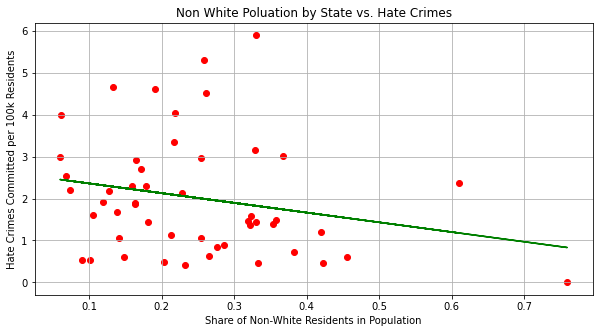

In [403]:
# create x and y variables
hc = data['hc16']
nw = data['non_white']

# generate lines of best fit
nw_data = nw.values.reshape(-1,1)
model = lm.LinearRegression().fit(nw_data, hc)
predicted = model.predict(nw_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(nw, hc, c='r')
plt.plot(nw, predicted, c='g')

# add labels and titles 
plt.title('Non White Poluation by State vs. Hate Crimes')
plt.xlabel('Share of Non-White Residents in Population')
plt.ylabel('Hate Crimes Committed per 100k Residents')

plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = -1.2911.x - 2.4487 with a R^(2) = 0.0183. There is a moderate negative correlation between `reported hate crime rates` and `non white populations`.

### Variable(s) Relevance to Reported Hate Crime Rates
The eleventh variable we want to test with `reported hate crimes rates` is `christian population`. This variable is interesting because we were motivated to do this for various reasons. In terms of diversity, similar to the higher the white resident population in an area, the less diversity of race in that area, the higher the `christian population` in an area, the less diversity of religion in that area. Being that hate crimes are motivated by prejudice, similar to arguments we've made previously, higher diversity can either cause higher tolerance of a given population towards those different than them, likely leading to less hate crimes, or lead to more hate crimes because there are more "targets" in more diverse areas. 

### Correlation Prediction 
Now, we have had three instances of diversity being a factor for the variables we've tested against `reported hate crimes rates`: 
- `reported hate crime rates` and `metropolitan populations` --> moderate positive correlation 
- `reported hate crimes rates` and `foreign born populations` --> strong positive correlation
- and `reported hate crimes rates` and rate of `non white populations` --> moderate negative correlation. 
We believed that `foreign born populations` and `non white populations` are more closely related to diversity as metrics. But since `foreign born populations` had a higher correlation than `non white populations`, in opposite respectives, we predict that the `christian population` and `reported hate crime rates` will result in a weak/moderate negative correlation (because the trend shows there is stronger correlation of the argument , the more diversity, the more `reported hate crimes`.) 

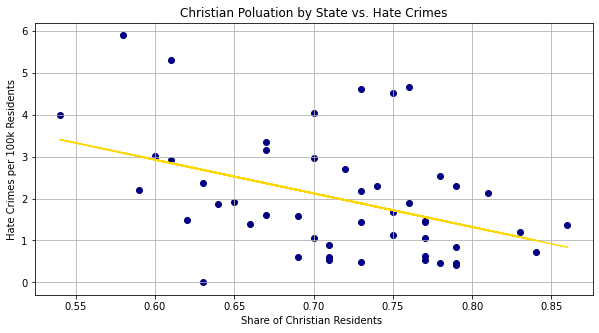

In [404]:
# create x and y variables
hc = data['hc16']
c = data['christian']

# generate line of best fit
c_data = c.values.reshape(-1,1)
model = lm.LinearRegression().fit(c_data, hc)
predicted = model.predict(c_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(c, hc, c='navy')
plt.plot(c, predicted, c='gold')

# add labels and titles 
plt.title('Christian Poluation by State vs. Hate Crimes')
plt.xlabel('Share of Christian Residents ')
plt.ylabel('Hate Crimes per 100k Residents')


plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = -8.8823x + 8.4088 with a R^(2) = 0.02277. There is a strong negative correlation between `reported hate crime rates` and `christian populations`. 

### Variable(s) Relevance to Reported Hate Crime Rates
The twelveth variable we want to test with `reported hate crime rates` is `ratio of men to women`. According to US FBI, in 2012, 73.8% of arrestees were males and out of those arrested for violent crimes 80.1% were males. This connection of men being the predominant offenders in crimes, including violent crimes can possibly mean there is a connection between men populations and `reported hate crimes rates` since hate crimes, as mostly violent crimes, are thereby, mostly committed by men.  

### Correlation Prediction 
The more men in an area more likely the more hate crimes committed in that area so we predict that `ratio of men to women` to `reported hate crime rates` will have a moderate positive correlation.

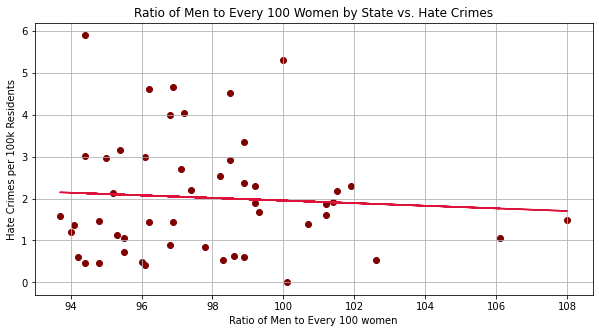

In [405]:
# create x and y variables
hc = data['hc16']
mtw = data['men_to_women']

# generate line of best fit
mtw_data = mtw.values.reshape(-1,1)
model = lm.LinearRegression().fit(mtw_data, hc)
predicted = model.predict(mtw_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(mtw, hc, c='maroon')
plt.plot(mtw, predicted, c='crimson')

# add labels and titles 
plt.title('Ratio of Men to Every 100 Women by State vs. Hate Crimes')
plt.xlabel('Ratio of Men to Every 100 women')
plt.ylabel('Hate Crimes per 100k Residents')

plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `lines of best fit` is y = -0.021x + 4.1134 with a R^(2) = 0.0022. There is a weak negative correlation between `reported hate crime rates` and `ratio of men to women`. 

### Variable(s) Relevance to Reported Hate Crime Rates
The thirteenth variable we want to test with `reported hate crime rates` is `state police budget`. `State police budgets` can be connected to the prevalance of crime in an area: metropolitian areas are known to have higher `police budgets` because there is a higher concentration of poverty and promixity which breeds crime. Also `police budgets` may be higher in areas of higher economic inequality. 

### Correlation Prediction 
Based on this, we can predict, if we consider:
- `reported hate crime rates` and `poverty` (strong positive for white poverty, moderate negative for overall poverty)
- `reported hate crime rates` and `metropolitan areas` (moderate/weak positive)
- `reported hate crime rates` and `gini index` (strong positive). 
With majority of these relating factors outputting positive correlations we predict that `state police budget` and `reported hate crime rates` will have a moderate/weak positive correlation. 

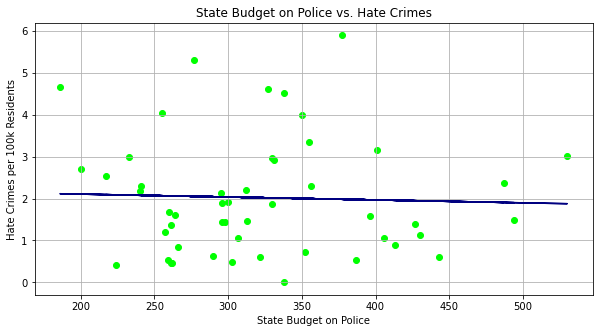

In [406]:
# create x and y variables
hc = data['hc16']
p = data['policing']

# generate line of best fit
p_data = p.values.reshape(-1,1)
model = lm.LinearRegression().fit(p_data, hc)
predicted = model.predict(p_data)

# plot the line of best fit and scatter plot
plt.figure(figsize=(10,5))
plt.scatter(p, hc, c='lime')
plt.plot(p, predicted, c='navy' )

# add labels and titles 
plt.title('State Budget on Police vs. Hate Crimes')
plt.xlabel('State Budget on Police')
plt.ylabel('Hate Crimes per 100k Residents')

plt.grid()

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = -0.0006x + 2.248 with a R^(2) = 0.0011. There is a weak negative correlation between rate of `reported hate crime rates` and rate of `state police budgets`. 

### Variable(s) Relevance to Reported Hate Crime Rates
The fourteenth and fifteenth variables we will be testing are `hate crime rates` and `Trump Voter population in 2016` and `the difference hate crime rates from before to after Trump's first year in office` and `Trump Voter population in 2016`. 

It is no secret that Trump's campaigns, policies, rhetoric, social media personality and more were heavily rooted in sentiments of prejudice, bigotry, and hostility towards various marganilized groups (whether by race, sex, nationality, citizenship, sexuality, gender identity, ethnicity, religion and more). Hate crimes, as we know, are crimes motivated by prejudice and aggression. 

We will be testing two years of hate crime data: 2016 before the election, and 2017 after one year of Trump's presidency to see how consistent the correlation is before and after his election. We predict that, considering events like Neo Nazi Rallies in 2017 in Charlottesville, Virginia, we may see a stronger positive correlation in 2017 than 2016 because those sentiments of prejudice that lead to events such as those is evidence for a higher inclination for those with those sentiments to act on it when they feel our President they believe supports their sentiments. 

The other variable test is `the difference hate crime rates from before to after Trump's first year in office` and `Trump Voter population in 2016` because we want to see the trend of states whom `hate crime rates` increased after Trump's first year as President vs before his first year President. 

With each of these tests we have also included bar graphs as visualization tools for us to see the `rate of reported hate crimes` for individual red states and blue states and the average for `rate for reported hate crmies` for red states in total and blue states in total for in the hate crime data year we are testing. 

### Correlation Prediction 
We predict that the `hate crime rates` and `Trump Voter population in 2016` test will result in a high positive correlation because the higher the `Trump Voter population` in a given area, most likely, the higher the prevalance of support and practice of prejudice, bigotry, and aggression towards marganilized communities in that area, therefore the higher the `hate crime rates` in that area.



In [407]:
# create a function thqt we will use to write the number of the height of the bar on the graph
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

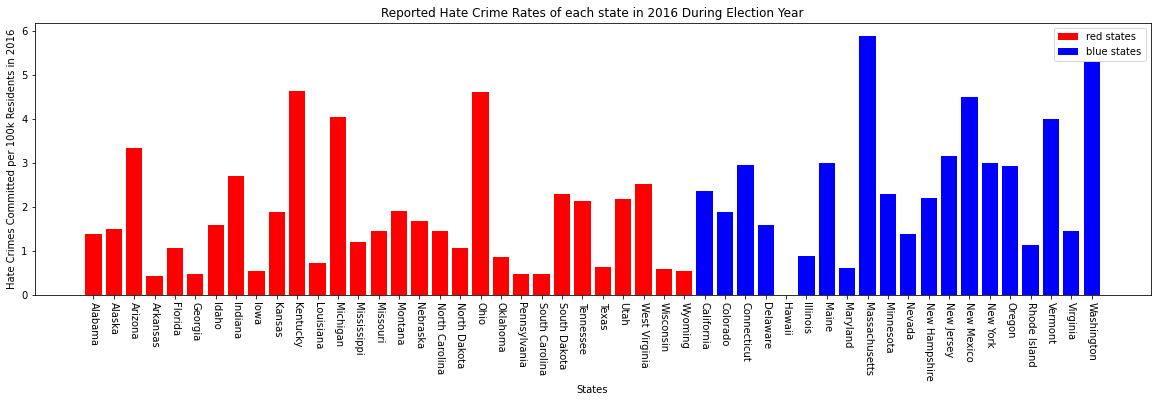

In [408]:
# create 2 dataframes for different political alignments
red = data[data.election_result == 'red']
blue = data[data.election_result == 'blue']

# create x and y variables 
rhc = red['hc16']
bhc = blue['hc16']
s1 = red['state']
s2 = blue['state']

# plot bar graph 
plt.figure(figsize=(20,5))
plt.bar(s1, rhc, label='red states', color='r')
plt.bar(s2, bhc,label='blue states', color='b')

# add labels and title
plt.title('Reported Hate Crime Rates of each state in 2016 During Election Year')
plt.xlabel('States')
plt.ylabel('Hate Crimes Committed per 100k Residents in 2016')
plt.xticks(rotation=270)
plt.legend()

Text(0, 0.5, 'Hate Crimes Reported Per 100k Residents in 2016')

<Figure size 720x360 with 0 Axes>

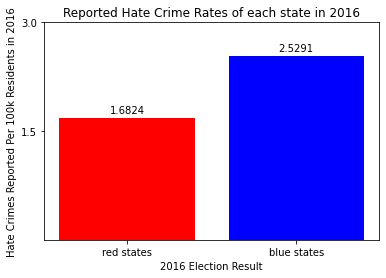

In [409]:
# find the average report hate crime rate for each group of states
reps1 = sum(red['hc16'])/len(red)
dems1 = sum(blue['hc16'])/len(blue)

# plot the bars with the label of the height
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
rects1 = ax.bar('red states', round(reps1, 4), color='red')
rects2 = ax.bar('blue states', round(dems1, 4), color='blue')
autolabel(rects1)
autolabel(rects2)

# adjust ticks and add labels and title
plt.title('Reported Hate Crime Rates of each state in 2016')
plt.yticks([1.5, 3])
plt.xlabel('2016 Election Result')
plt.ylabel('Hate Crimes Reported Per 100k Residents in 2016')


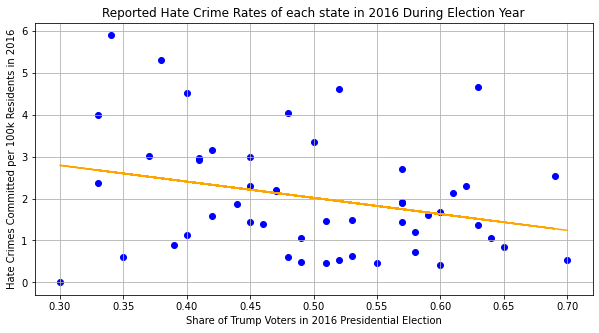

In [410]:
# create x and y variables
hc = data['hc16']
tp = data['trump_voters']

# generate line of best fit 
tp_data = tp.values.reshape(-1,1)
model = lm.LinearRegression().fit(tp_data, hc)
predicted = model.predict(tp_data)

# graph scatter plot and linear regression line
plt.figure(figsize=(10,5))
plt.scatter(tp, hc, c='b')
plt.plot(tp, predicted, c='orange')

# add labels and title 
plt.title('Reported Hate Crime Rates of each state in 2016 During Election Year')
plt.xlabel('Share of Trump Voters in 2016 Presidential Election')
plt.ylabel('Hate Crimes Committed per 100k Residents in 2016')

plt.grid()

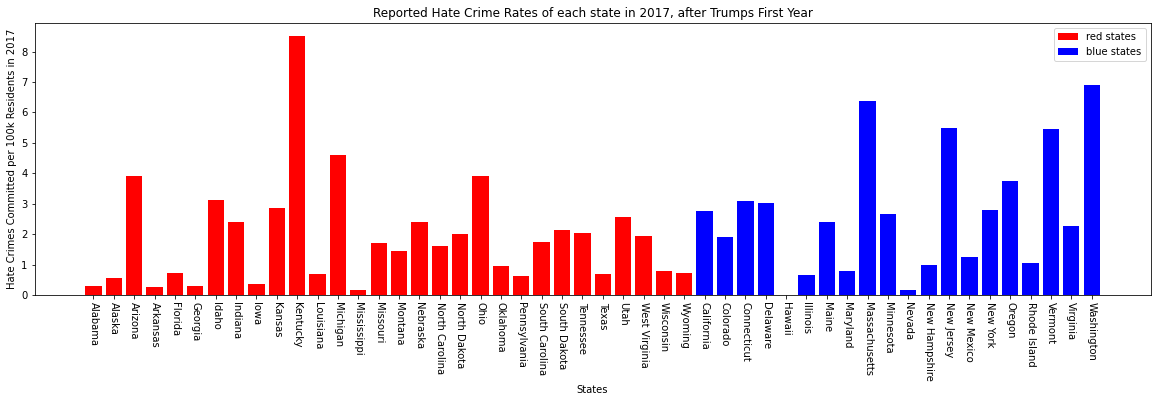

In [411]:
# create 2 dataframes for different political alignments
red = data[data.election_result == 'red']
blue = data[data.election_result == 'blue']

# create x and y variables 
rhc = red['hc17']
bhc = blue['hc17']
s1 = red['state']
s2 = blue['state']

# plot bar graph 
plt.figure(figsize=(20,5))
plt.bar(s1, rhc, label='red states', color='r')
plt.bar(s2, bhc,label='blue states', color='b')

# add labels and title
plt.title('Reported Hate Crime Rates of each state in 2017, after Trumps First Year')
plt.xlabel('States')
plt.ylabel('Hate Crimes Committed per 100k Residents in 2017')
plt.xticks(rotation=270)

plt.legend()

Text(0, 0.5, 'Hate Crimes Reported Per 100k Residents in 2017')

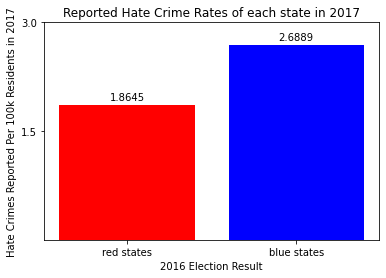

In [412]:
# find the average report hate crime rate for each group of states
reps = sum(red['hc17'])/len(red)
dems = sum(blue['hc17'])/len(blue)

# plot the bars with the label of the height
fig, ax = plt.subplots()
rects1 = ax.bar('red states', round(reps, 4), color='red')
rects2 = ax.bar('blue states', round(dems, 4), color='blue')
autolabel(rects1)
autolabel(rects2)

# adjust ticks and add labels and title
plt.title('Reported Hate Crime Rates of each state in 2017')
plt.yticks([1.5, 3])
plt.xlabel('2016 Election Result')
plt.ylabel('Hate Crimes Reported Per 100k Residents in 2017')

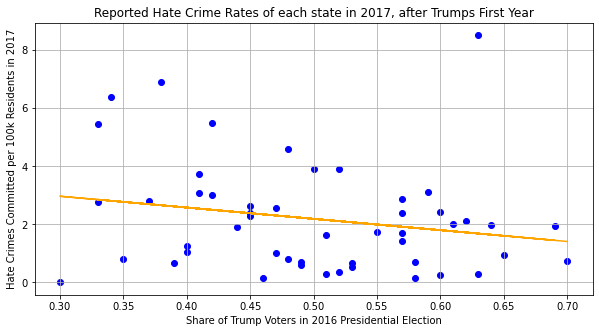

In [413]:
# create x and y variables
hc = data['hc17']
tp = data['trump_voters']

# generate line of best fit 
tp_data = tp.values.reshape(-1,1)
model = lm.LinearRegression().fit(tp_data, hc)
predicted = model.predict(tp_data)

# graph scatter plot and linear regression line
plt.figure(figsize=(10,5))
plt.scatter(tp, hc, c='b')
plt.plot(tp, predicted, c='orange')

# add labels and title 
plt.title('Reported Hate Crime Rates of each state in 2017, after Trumps First Year')
plt.xlabel('Share of Trump Voters in 2016 Presidential Election')
plt.ylabel('Hate Crimes Committed per 100k Residents in 2017')


plt.grid()

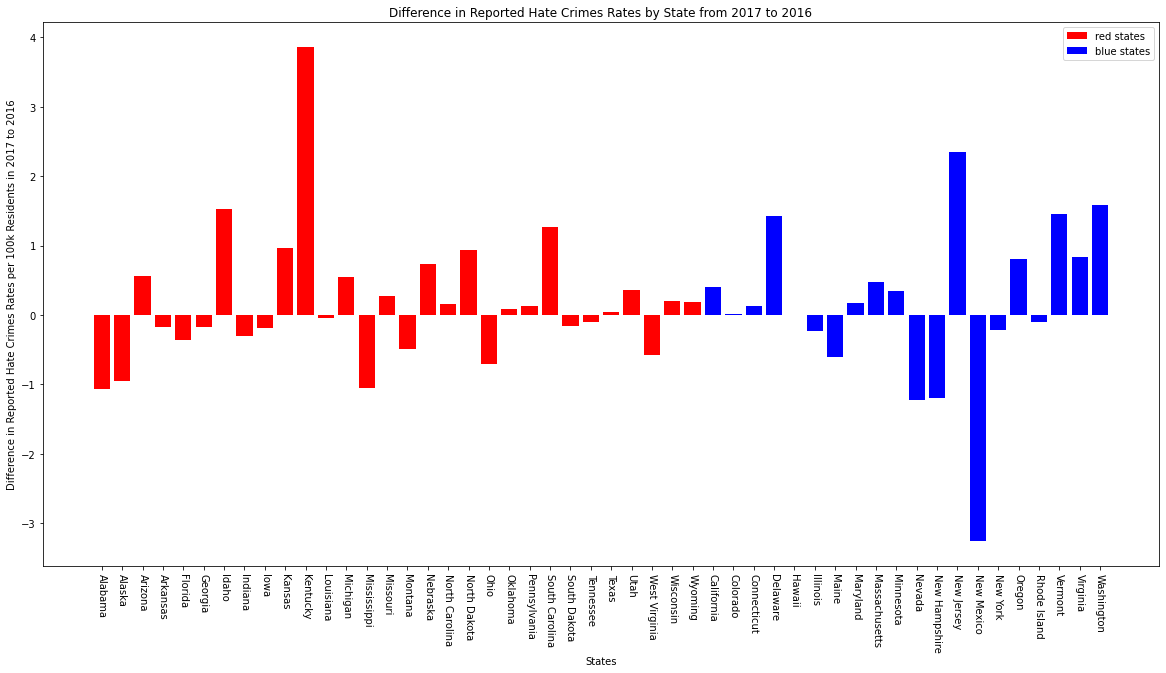

In [414]:
# create 2 dataframes for different political alignments
red = data[data.election_result == 'red']
blue = data[data.election_result == 'blue']

# create x and y variables
rhc = red['hc_']
bhc = blue['hc_']
s1 = red['state']
s2 = blue['state']

# plot bar graph 
plt.figure(figsize=(20,10))
plt.bar(s1, rhc, label='red states', color='r')
plt.bar(s2, bhc,label='blue states', color='b')

# add labels and title
plt.title('Difference in Reported Hate Crimes Rates by State from 2017 to 2016')
plt.xlabel('States')
plt.ylabel('Difference in Reported Hate Crimes Rates per 100k Residents in 2017 to 2016')
plt.xticks(rotation=270)
plt.legend()

Text(0, 0.5, 'Difference in Hate Crimes Rates Reported Per 100k Residents from 2016 and 2017')

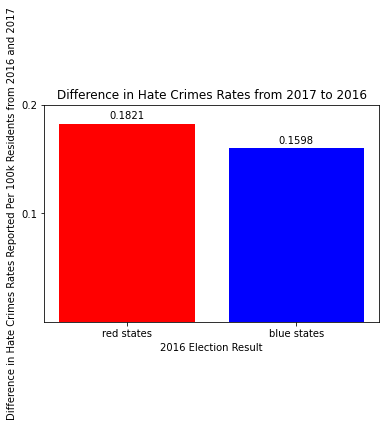

In [415]:
# find the average report hate crime rate for each group of states
reps = sum(red['hc_'])/len(red)
dems = sum(blue['hc_'])/len(blue)

# plot the bars with the label of the height
fig, ax = plt.subplots()
rects1 = ax.bar('red states', round(reps, 4), color='red')
rects2 = ax.bar('blue states', round(dems, 4), color='blue')
autolabel(rects1)
autolabel(rects2)

# adjust ticks and add labels and title
plt.yticks([.1, .2])
plt.title('Difference in Hate Crimes Rates from 2017 to 2016')
plt.xlabel('2016 Election Result')
plt.ylabel('Difference in Hate Crimes Rates Reported Per 100k Residents from 2016 and 2017')

Text(0, 0.5, 'Hate Crimes Reported per 100k Residents in 2017')

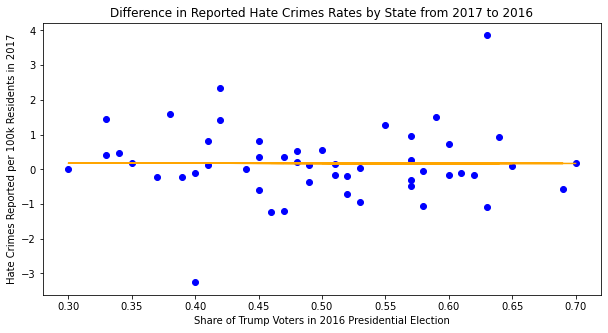

In [416]:
# create x and y variables
hc = data['hc_']
tp = data['trump_voters']

# generate line of best fit 
tp_data = tp.values.reshape(-1,1)
model = lm.LinearRegression().fit(tp_data, hc)
predicted = model.predict(tp_data)

# graph scatter plot and linear regression line
plt.figure(figsize=(10,5))
plt.scatter(tp, hc, c='b')
plt.plot(tp, predicted, c='orange')

# add labels and title 
plt.title('Difference in Reported Hate Crimes Rates by State from 2017 to 2016')
plt.xlabel('Share of Trump Voters in 2016 Presidential Election')
plt.ylabel('Hate Crimes Reported per 100k Residents in 2017')


### Line of Best Fit and Correlation Result
In the graph above, the equation for `lines of best fit` is y = -.0967x + 0.2248 with a R^(2) = 8E-05. There is a weak negative correlation between `difference in reported hate crime rates from 2017 to 2016` and `Trump Voter population in 2016`.

### Variable(s) Relevance to Reported Hate Crime Rates
For the last two variables, we will be testing `reported hate crime rates` to `strictness of state gun laws` and `state gay marriage laws before national legalization`. We believe that `strictness of state gun laws` has a connection to political alignment of that state, meaning that the looser the gun laws, more likely it's a red state, and vice versa for blue states. We know blue states on average have higher diversity than red states and we mentioned throughout this investigation how diversity is an important factor ro consider in hate crime prevelance because of its connections to tolerance vs targets. 


### How We Will Visualize This Data Differently 
We decided to use bar graphs instead of scatter plots for these tests and visualizations because for each of these independent variables, the values are limited to either only whole numbers on the interval (1 to 5), or only odd whole numbers on the interval (1 to 5). 

Each bar represents some whole number on the interval (1 to 5) and the height of each bar is the average `reported hate crime rate` for all the states whose x value is the value that that bar represents. 


### Correlation Prediction 
Based on gun laws connections to red states we predict that there will be a negative correlation between `reported hate crime rates` and `strictness of state gun laws`, because as we saw above, red states on average have lower `reported hate crime rates` than blue states. As for our prediction for `reported hate crime rates` and `state gay marriage laws before national legalization`, again this is another variable that correlates to diversity. The more supportive `state gay marriage laws before national legalization`, most likely, the higher the queer residency of that population and the higher diversity of sexuality in that poulation which will likely either cause higher tolerance of a given population towards those different than them, likely leading to less hate crimes, or lead to more hate crimes because there are more "targets" in more diverse areas. 

I think it is also important to note that the national legalization of gay marriage occured in 2015 and the `reported hate crime rates` we are testing it on is from 2016, a year after the ruling. This will most likely increase tensions between the queer community & their allies and homophobic populations. Also considering, we have had four instances of diversity being a factor for the variables we've tested against `reported hate crimes rates`: 
 - `reported hate crime rates` and `metropolitan populations` --> moderate positive correlation
 - `reported hate crimes rates` and `foreign born populations` --> strong positive correlation
 - `reported hate crimes rates` and rate of `non white populations` --> moderate negative correlation
 - `reported hate crime rates` and rate of `christian populations` --> strong negative correlation. 
With an even split between of these related correlations being positive or negative AND the context of tensions increasing against the queer community after the Supreme Court ruling, we predict that `reported hate crime rates` and `state gay marriage laws before national legalization` will have a moderate/weak positive correlation.


Text(0, 0.5, 'Average Hate Crimes Committed Per 100k Residents')

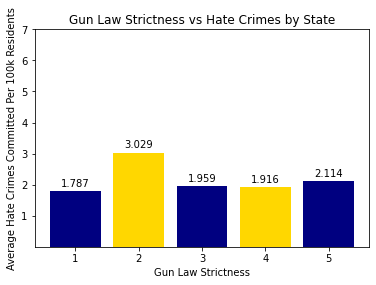

In [421]:
# create 5 dataframes for different tiers of gun law strictness
one = data[data.gun_law == 1]
two = data[data.gun_law == 2]
three = data[data.gun_law == 3]
four = data[data.gun_law == 4]
five = data[data.gun_law == 5]

# find the average of report hate crimes rates for each tier 
o = sum(one['hc16'])/len(one)
tw = sum(two['hc16'])/len(two)
th = sum(three['hc16'])/len(three)
fo = sum(four['hc16'])/len(four)
fi = sum(five['hc16'])/len(five)

# plot the bars with the label of the height
fig, ax = plt.subplots()
rects1 = ax.bar('1', round(o, 3), color='navy')
rects2 = ax.bar('2', round(tw, 3), color='gold')
rects3 = ax.bar('3', round(th, 3), color='navy')
rects4 = ax.bar('4', round(fo, 3), color='gold')
rects5 = ax.bar('5', round(fi, 3), color='navy')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# adjust ticks and add labels and title
plt.title('Gun Law Strictness vs Hate Crimes by State')
plt.yticks([1, 2, 3, 4, 5, 6, 7])
plt.xlabel('Gun Law Strictness')
plt.ylabel('Average Hate Crimes Committed Per 100k Residents')

### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = 0.3373x + 1.9155 with a R^(2) = 0.1047. There is a weak positive correlation between `reported hate crimes rates` and `strictness of gun laws`.

Text(0, 0.5, 'Average Hate Crimes Committed Per 100k Residents')

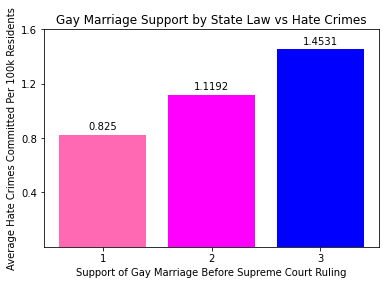

In [420]:
# create 3 dataframes for tiers of gay marriage support legally 
one1 = data[data.gay_marriage == 1]
three3 = data[data.gay_marriage == 3]
five5 = data[data.gay_marriage == 5]

# find the average of report hate crimes rates for each tier 
o1 = sum(one['hc16'])/len(one1)
t3 = sum(three['hc16'])/len(three3)
f5 = sum(five['hc16'])/len(five5)

# plot the bars with the label of the height
fig, ax = plt.subplots()
rects1 = ax.bar('1', round(o1, 4), color='hotpink')
rects2 = ax.bar('2', round(t3, 4), color='magenta')
rects3 = ax.bar('3', round(f5, 4), color='blue')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# adjust ticks and add labels and title
plt.title('Gay Marriage Support by State Law vs Hate Crimes')
plt.yticks([.4,.8,1.2,1.6])
plt.xlabel('Support of Gay Marriage Before Supreme Court Ruling')
plt.ylabel('Average Hate Crimes Committed Per 100k Residents')


### Line of Best Fit and Correlation Result
In the graph above, the equation for `line of best fit` is y = 0.314x + 0.5043 with a R^(2) = 0.9986. There is a weak positive correlation between `reported hate crimes rates` and `state gay marriage laws before national legalization`.

# Analysis of Results

## Positive Correlation Rankings:
- Gini Index (9.22) --> strong
- White Residents in Poverty (7.86) --> strong
- Unemployment (7.077) --> strong
- Foreign Born (6.57) --> strong
- High School Diploma (5.34) --> moderate
- 4 Year College Degree (4.41) --> moderate
- Metro Population (0.5625) --> weak
- Level of Gun Law Restriction (0.337) --> weak
- Level of Support for Gay Marriage (0.314) --> weak
- Median Income (2E-05) --> weak

## Negative Correlation Rankings:
- Christian Residents (8.81) --> strong
- Residents in Poverty (3.87) --> moderate
- Non-White Resident Population (1.29) --> moderate
- Trump Voters (0.0967) --> weak
- Ratio of Men per 100 Women (0.021) --> weak
- State Police Budget (0.0006) --> weak

## What can conclude about hate crimes? 
Based on our investigation, Gini Index, Christian Residents in a population and White Residents in Poverty in a population are the strongest metrics for understanding who environments influence the occurence of hate crimes. We infer that income inequality is the biggest correlating factor because of its direct influence to population happiness and satisfaction. The more dissatisfied a population is the more disconnected they are from one another and about their current situation which is breeding ground for developing prejudice out of grievances. This also connects to why white residents in poverty was such a correlating variable as well. When you think about the types of environments that have higher density of white poverty you can expect that to be a breeding ground for anti-POC, anti-immigrant and eurocentric sentiments because these residents need a scapegoat/explanation for their suffering of poverty. Poverty also is connected to crime so this is another factor at work that can be the explanation behind this finding. And as for the Christian population being strongly negatively correlated I think that can mean a few things: when it comes to religion oriented hate crimes they are more prevalent in populations with diverse religious groups, a higher presence of Christianity creates a greater unity and population happiness/satisfaction in a community or states with higher Christian populations may be less diverse in other aspects that can cause marganilized communitites to report less hate crimes than actually occuring in those communities. 

Originally we had predicted that education level, median income and Donald trump voters would have the strongest correlation to hate crimes. We were shocked by the result of the education level until we realized something. Income inequality is the most closely correlated variable to hate crimes. The higher level of education someone has, the higher paying job they have. So maybe high education level connects to income inequality because you have populations of highly educated people with high paying jobs and lower educated people with lower paying jobs, which would explain why college degrees have a higher correlation magnitude than high school diplomas. Because higher prevalance of college degrees by this logic would infleunce more income inequality. 

I think something is to be said of diversity's role in hate crimes. Foreign born has a strong correlation to hate crimes, showing how because of nativist sentiments, hate crimes are reported at higher rates in areas with higher immigrant populations. And for gay marriage, the states that support gay marriage more, most likely leading to more gay residents also saw a positive correlation, though weak, but we can still see how diversity plays a role in hate crimes (the more diversity, the more "targets" the more hate crimes). At least for sexuality oriented and native born oriented hate crimes. But for non-white populations there was a negative moderate correlation suggesting the more POC living in an area creates a sense of tolerance of different races and ethnicities that lead to lower hate crime rates.

## Ways We Can Improve This Investigation
This investigation was extremely informative and honestly a passion project for me. I would love in the future to expand the same sixe of the data point to influence counties, and as I mentioned earlier in the investigation, calculate  different regression lines for each scatter plot so that we can use the one with the highest R squared value, to see it's magnitude to determine correlation. Also evaluating these variables over time (similar to what we did for Trump voters) can produce interesting results. 

## Works Cited

Fivethirtyeight. “Fivethirtyeight/Data.” GitHub, github.com/fivethirtyeight/data/blob/master/hate-crimes/hate_crimes.csv. 

Curran. “Curran/Data.” GitHub, github.com/curran/data/blob/gh-pages/amitkaps/weed/Demographics_State.csv. 

“2016 Hate Crime Statistics.” FBI, FBI, 13 Nov. 2017, www.fbi.gov/news/stories/2016-hate-crime-statistics. 

“Religion in America: U.S. Religious Data, Demographics and Statistics.” Pew Research Center's Religion & Public Life Project, 9 Sept. 2020, www.pewforum.org/religious-landscape-study/compare/religious-tradition/by/state/. 

“Same-Sex Marriage, State by State.” Pew Research Center's Religion & Public Life Project, 30 May 2020, www.pewforum.org/2015/06/26/same-sex-marriage-state-by-state/. 

“United States: Demographics.” Data.census.gov, data.census.gov/cedsci/profile?g=0100000US. 
“2016 Presidential Election Results.” The New York Times, The New York Times, www.nytimes.com/elections/2016/results/president. 

Higgins, Paul, et al. “Gun Laws By State: The Complete and Updated Guide.” GunsToCarry, 28 Aug. 2020, www.gunstocarry.com/gun-laws-state/. 

“Table 12.” FBI, FBI, 3 Nov. 2017, ucr.fbi.gov/hate-crime/2016/tables/table-12.

“Table 12.” FBI, FBI, 3 Nov. 2018, ucr.fbi.gov/hate-crime/2017/tables/table-12.

Stojiljković, Mirko. “Linear Regression in Python.” Real Python, Real Python, 26 Nov. 2020, realpython.com/linear-regression-in-python/.